# <font color="red">CIÊNCIA DOS DADOS</font>

## <font color="black">Princípios do reconhecimento facial</font>

Professor: Eduardo Rocha

Faz [click aqui](https://www.youtube.com/watch?v=zDBU0-g6BKQ) para ver o vídeo em Youtube.

[link das imagens](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html?highlight=faces) 

## <font color="blue">1°  Problema de negócio</font>

Precisamos criar um detector de **face**. Para isso nós vamos fazer o seguinte:

1. Entender como os Dados são processados.
2. Reduzir a dimensionalidade dos Dados.
3. Criar a máquina com SVM (classifier).
4. Usar o GrisSearch para ecolher os melhores Hyperparâmetros do SVM.


**Transformação da imagem bidimensional num vetor**

* Assuma-se uma determinada imagem facial $(x, y)$ num espaço bidimensional $N$x$N$. Essa imagem pode ser encarada como um vetor de dimensão $N2$.

* Nesse caso uma imagem com $256$x$256$ pixéis passa a ser considerada um vector de dimensão $65536$, ou então um ponto num espaço com $65536$ dimensões.

* Como resultado, um conjunto de imagens pode mapearum grupo de pontos neste espaço gigantesco.


**Aplicação do PCA (Principal component analysis) para reduzir a dimensionalidade**

* Cada face é decomposta numa série de componentes principais, ou vetores próprios da matriz de covariância, definidos por um conjunto de faces de referência. 

* Basicamente, cada face pode ser representada como a combinação linear de diversas Eigenfaces. 

* Eigenfaces é o nome dado a um conjunto de vetores próprios quando usado no problema de _visão computacional_ do reconhecimento de rosto humano.

* Está técnica foi desenvolvida por Sirovich e Kirby ($1987$) com o objetivo de representar, de forma eficiente, imagens de faces através da análise de componentes principais (**PCA**-Principal Component Analysis).

* As imagens originais tinham $250$x$250$ pixels, porém foi realizado o redimensionamento para $62$x$47$. 

* Há um total de $13\,233$ imagens e $5\,749$ pessoas no banco de Dados, ou seja, tem pessoas que tem mais de uma imagem, como por exemplo o **G. W. Bush**.  




## <font color="blue">2°  Análise exploratória de Dados</font>

In [1]:
# Reconhecimento de face

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print("")
print("")
print(faces.images.shape)


# Pegamos faces de pessoas quey tenham mais de 60 fotos!

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


(1348, 62, 47)


In [2]:
faces.data

array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
          1.6666666 ,   0.33333334],
       [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
        243.        , 238.33333   ],
       [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
        194.33333   , 241.        ],
       ...,
       [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
        147.        , 141.66667   ],
       [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
        176.33333   , 161.        ],
       [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
         42.        ,  69.666664  ]], dtype=float32)

In [3]:
print(faces.target)

[1 3 3 ... 7 3 5]


In [4]:
# Labeled faces in the Wild (LFW) dataset

fetch_lfw_people


<function sklearn.datasets.lfw.fetch_lfw_people(data_home=None, funneled=True, resize=0.5, min_faces_per_person=0, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True, return_X_y=False)>

## <font color="blue">3°  Pré-processamento dos Dados</font>

In [5]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')






fig, ax = plt.subplots(3, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[]),
    xlabel=faces.target_names[faces.target[i]]
    
    

## <font color="blue">4°  Máquina preditiva detectora de face</font>

In [6]:
# Importação de bibliotecas

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


# SVC -->  É nosso classificador


In [7]:
# Criação da máquina preditiva com SVC e PCA

pca = PCA(n_components=150, whiten=True, random_state=7)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# random_state --> Para replicar o mesmos resultados que ele.
# rbf --> Um kernel que não necessariamente é linear
# Usamos este KERNEL porque separa melhor os Dados com um HIPERPLANO

In [8]:
# Separação dos Dados de Treino e Teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=7)
 
    

In [9]:
# Tunning de Hyperparâmetro

from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C':[1, 5, 10, 50],
              'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}


grid = GridSearchCV(model, param_grid)

# Cada algoritmo tem Hyperparâmetros
# svc_c --> Hyperparâmetro de regularização
# svc_gamma --> Hyperparâmetro 

In [10]:
# Cálculo dos melhores Hyperparâmetros

grid.fit(x_train, y_train)

print(grid.best_params_)


{'svc__C': 5, 'svc__gamma': 0.001}


In [11]:
# Visualizando o resultado do Tunning 

grid.best_estimator_



Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=7, svd_solver='auto', tol=0.0, whiten=True)),
                ('svc',
                 SVC(C=5, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [12]:
# Treinando a máquina preditiva

model = grid.best_estimator_
yfit = model.predict(x_test)


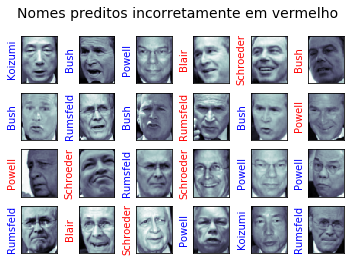

In [15]:
# Resultado do treinamento

fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])

    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='blue' if yfit[i]==y_test[i] else 'red')
    
fig.suptitle('Nomes preditos incorretamente em vermelho', size=14);    
    
    
    

## <font color="blue">5°  Avaliação da máquina preditiva</font>

In [17]:
# Avaliação da máquina preditiva com o Classification Report
# A nossa avaliação é de APRENDIZADO SUPERVISIONADO


from sklearn.metrics import classification_report

print(classification_report(y_test, yfit, target_names=faces.target_names))



                   precision    recall  f1-score   support

     Ariel Sharon       0.90      0.62      0.73        29
     Colin Powell       0.78      0.88      0.83        78
  Donald Rumsfeld       0.73      0.82      0.77        39
    George W Bush       0.92      0.83      0.87       157
Gerhard Schroeder       0.72      0.79      0.75        29
      Hugo Chavez       0.88      0.71      0.79        21
Junichiro Koizumi       0.67      1.00      0.80        12
       Tony Blair       0.79      0.82      0.80        40

         accuracy                           0.82       405
        macro avg       0.80      0.81      0.79       405
     weighted avg       0.83      0.82      0.82       405



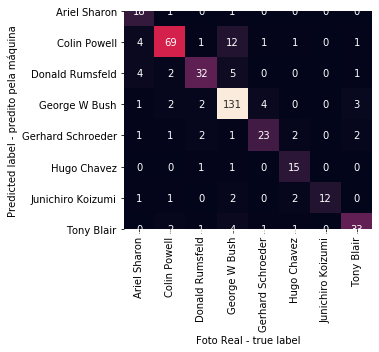

In [18]:
# Avaliação da máquina preditiva com a Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns 


mat = confusion_matrix(y_test, yfit)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('Foto Real - true label')
plt.ylabel('Predicted label - predito pela máquina');




In [20]:
# Avaliação da máquina preditiva com o Accuracy Score


from sklearn.metrics import accuracy_score

resultado = accuracy_score(y_test, yfit)


In [36]:
print("A acurácia de nosso modelo é: {:0.2f}%".format(resultado))

A acurácia de nosso modelo é: 0.82%


### <font color="green">Aprendemos :</font>

* como os Dados de imagem são processados para utilização em Machine Learning

* a usar o **PCA** para reduzir a **dimensionalidade** dos Dados

* e entendemos como o **SVM** trabalha na separação de Dados não lineares 

* a Tunnar os Hyperparâmetros dos algoritmos com o GridSearch 